In [371]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray

from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier

import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.pipeline import make_pipeline

In [372]:
fdf =pd.read_csv('five_sec')
fdf.head()

,dataset_5secondWindow.csv,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,0.0,16170.0,78.0,NaN,100.0,9.811476,9.758895,9.849411,0.014626,0.029340,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
1,1.0,15871.0,145.0,NaN,100.0,9.939207,7.707437,17.146631,1.775944,0.999925,...,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,Car,U12
2,2.0,16811.0,150.0,NaN,100.0,9.827178,9.804817,9.849262,0.011199,0.665215,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
3,3.0,15831.0,105.0,NaN,77.0,9.673039,7.659674,12.304298,0.862553,0.996221,...,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,Car,U12
4,4.0,876.0,77.0,NaN,100.0,9.993466,8.965621,10.891645,0.504117,0.563792,...,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,NaN,Car,U1


In [373]:
fdf.isnull().sum().sort_values(ascending=False)

activityrecognition#0                5894
android.sensor.step_counter#std      5662
android.sensor.proximity#std         5611
android.sensor.proximity#max         4775
android.sensor.proximity#min         4775
                                     ... 
android.sensor.accelerometer#min        1
android.sensor.accelerometer#mean       1
activityrecognition#1                   1
time                                    1
user                                    1
Length: 71, dtype: int64

In [374]:
fdf.shape

(5894, 71)

In [375]:
fdf = fdf.dropna(how='all')
fdf.shape

(5893, 71)

In [376]:
print(fdf['user'].isna().sum())
print(fdf['target'].isna().sum())

0
0


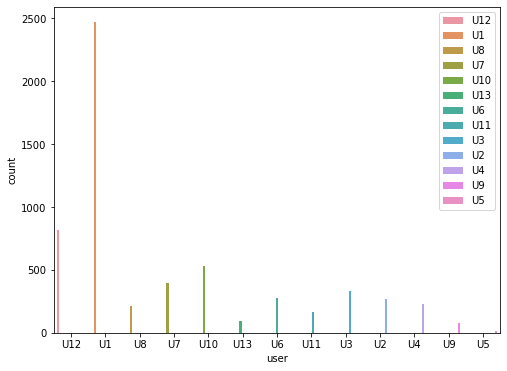

In [377]:
plt.figure(figsize=(8, 6))
sns.countplot(x='user', hue='user',data=fdf)
plt.legend(loc='upper right')
plt.show()

In [378]:
fdf['user'].value_counts()

U1     2470
U12     820
U10     531
U7      397
U3      331
U6      279
U2      271
U4      227
U8      214
U11     167
U13      90
U9       79
U5       17
Name: user, dtype: int64

In [379]:
oe = OrdinalEncoder()
cd = asarray(fdf['user'])
fdf['user'] = oe.fit_transform(cd.reshape(-1,1))
print(fdf['user'].value_counts())

0.0     2470
3.0      820
1.0      531
10.0     397
6.0      331
9.0      279
5.0      271
7.0      227
11.0     214
2.0      167
4.0       90
12.0      79
8.0       17
Name: user, dtype: int64


In [380]:
fdf = fdf.sort_values(by='user')
fdf

,dataset_5secondWindow.csv,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
2946,2946.0,5228.0,190.0,NaN,92.0,10.179832,10.137434,10.207683,0.020380,0.995086,...,84.350732,84.350732,84.350732,0.923820,NaN,NaN,NaN,NaN,Train,0.0
3075,3075.0,5835.0,193.0,NaN,35.0,10.179362,9.853068,10.587065,0.167584,0.987558,...,89.762268,89.762268,89.762268,0.001198,NaN,NaN,NaN,NaN,Train,0.0
3076,3076.0,2274.0,256.0,NaN,8.0,9.657759,9.029124,10.286443,0.414025,0.844973,...,89.769040,89.769040,89.769040,0.013131,30.75,30.75,30.75,NaN,Car,0.0
3077,3077.0,7287.0,86.0,NaN,100.0,10.299321,8.088142,12.456252,1.604990,0.968824,...,88.572737,88.572737,88.572737,0.095157,0.75,0.75,0.75,NaN,Walking,0.0
3079,3079.0,184.0,91.0,NaN,85.0,9.729062,7.139446,14.355289,2.184604,0.928255,...,89.773691,89.767912,89.779470,0.008173,11.00,11.00,11.00,NaN,Bus,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,1198.0,12888.0,47.0,NaN,100.0,10.672879,6.701437,14.237094,2.590851,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,12.0
3307,3307.0,12836.0,94.0,NaN,85.0,10.926161,7.289184,16.733950,2.618939,NaN,...,83.545534,83.545534,83.545534,1.800958,NaN,NaN,NaN,NaN,Walking,12.0
4087,4087.0,12806.0,64.0,NaN,100.0,11.173896,6.759052,17.244942,2.834614,NaN,...,78.116997,78.116997,78.116997,1.800958,NaN,NaN,NaN,NaN,Walking,12.0
3576,3576.0,12897.0,56.0,NaN,100.0,8.883861,4.312250,14.790456,3.825252,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,12.0


In [381]:
fdf.reset_index(inplace=True)

In [382]:
fdf

,index,dataset_5secondWindow.csv,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,2946,2946.0,5228.0,190.0,NaN,92.0,10.179832,10.137434,10.207683,0.020380,...,84.350732,84.350732,84.350732,0.923820,NaN,NaN,NaN,NaN,Train,0.0
1,3075,3075.0,5835.0,193.0,NaN,35.0,10.179362,9.853068,10.587065,0.167584,...,89.762268,89.762268,89.762268,0.001198,NaN,NaN,NaN,NaN,Train,0.0
2,3076,3076.0,2274.0,256.0,NaN,8.0,9.657759,9.029124,10.286443,0.414025,...,89.769040,89.769040,89.769040,0.013131,30.75,30.75,30.75,NaN,Car,0.0
3,3077,3077.0,7287.0,86.0,NaN,100.0,10.299321,8.088142,12.456252,1.604990,...,88.572737,88.572737,88.572737,0.095157,0.75,0.75,0.75,NaN,Walking,0.0
4,3079,3079.0,184.0,91.0,NaN,85.0,9.729062,7.139446,14.355289,2.184604,...,89.773691,89.767912,89.779470,0.008173,11.00,11.00,11.00,NaN,Bus,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,1198,1198.0,12888.0,47.0,NaN,100.0,10.672879,6.701437,14.237094,2.590851,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,12.0
5889,3307,3307.0,12836.0,94.0,NaN,85.0,10.926161,7.289184,16.733950,2.618939,...,83.545534,83.545534,83.545534,1.800958,NaN,NaN,NaN,NaN,Walking,12.0
5890,4087,4087.0,12806.0,64.0,NaN,100.0,11.173896,6.759052,17.244942,2.834614,...,78.116997,78.116997,78.116997,1.800958,NaN,NaN,NaN,NaN,Walking,12.0
5891,3576,3576.0,12897.0,56.0,NaN,100.0,8.883861,4.312250,14.790456,3.825252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,12.0


In [383]:
fdf = fdf.drop(['index','dataset_5secondWindow.csv','id','activityrecognition#0','user'], axis=1)

In [384]:
fdf

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,...,android.sensor.step_counter#std,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target
0,190.0,92.0,10.179832,10.137434,10.207683,0.020380,0.995086,0.995067,0.995112,0.000017,...,NaN,84.350732,84.350732,84.350732,0.923820,NaN,NaN,NaN,NaN,Train
1,193.0,35.0,10.179362,9.853068,10.587065,0.167584,0.987558,0.987359,0.987745,0.000117,...,NaN,89.762268,89.762268,89.762268,0.001198,NaN,NaN,NaN,NaN,Train
2,256.0,8.0,9.657759,9.029124,10.286443,0.414025,0.844973,0.840452,0.851091,0.004017,...,NaN,89.769040,89.769040,89.769040,0.013131,30.75,30.75,30.75,NaN,Car
3,86.0,100.0,10.299321,8.088142,12.456252,1.604990,0.968824,0.956427,0.975352,0.008850,...,NaN,88.572737,88.572737,88.572737,0.095157,0.75,0.75,0.75,NaN,Walking
4,91.0,85.0,9.729062,7.139446,14.355289,2.184604,0.928255,0.925184,0.931989,0.002932,...,NaN,89.773691,89.767912,89.779470,0.008173,11.00,11.00,11.00,NaN,Bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,47.0,100.0,10.672879,6.701437,14.237094,2.590851,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking
5889,94.0,85.0,10.926161,7.289184,16.733950,2.618939,NaN,NaN,NaN,NaN,...,NaN,83.545534,83.545534,83.545534,1.800958,NaN,NaN,NaN,NaN,Walking
5890,64.0,100.0,11.173896,6.759052,17.244942,2.834614,NaN,NaN,NaN,NaN,...,NaN,78.116997,78.116997,78.116997,1.800958,NaN,NaN,NaN,NaN,Walking
5891,56.0,100.0,8.883861,4.312250,14.790456,3.825252,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking


In [385]:
fdf = fdf.fillna(0)

In [386]:
fdf.isnull().sum().sort_values(ascending=False)

time                                              0
android.sensor.rotation_vector#mean               0
android.sensor.magnetic_field_uncalibrated#max    0
android.sensor.magnetic_field_uncalibrated#std    0
android.sensor.orientation#mean                   0
                                                 ..
android.sensor.linear_acceleration#max            0
android.sensor.linear_acceleration#std            0
android.sensor.magnetic_field#mean                0
android.sensor.magnetic_field#min                 0
target                                            0
Length: 67, dtype: int64

In [387]:
cd = asarray(fdf['target'])
fdf['target'] = oe.fit_transform(cd.reshape(-1,1))

In [388]:
X,y = fdf.drop(['target'], axis=1), fdf['target']

In [389]:
data_test = fdf.iloc[:2470, :]
data_train = fdf.iloc[2470: , :]

In [390]:
X_train = data_train.iloc[:,:66]
y_train = data_train.iloc[:, 66:]

X_test = data_test.iloc[:, :66]
y_test = data_test.iloc[:, 66:]

In [391]:
tree_classifiers= {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":ExtraTreesClassifier(),
  "Random Forest": RandomForestClassifier()
}

In [392]:
results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

for model_name, model in tree_classifiers.items():
    
    start_time = time.time()
    model.fit(X_train, y_train)
    total_time = time.time() - start_time
        
    pred = model.predict(X_test)
    
    results = results.append({"Model":    model_name,
                              "Accuracy": accuracy_score(y_test, pred)*100,
                              "Bal Acc.": balanced_accuracy_score(y_test, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              
results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='Blues')

C:\Users\Abubakr\AppData\Local\Temp\ipykernel_10340\3920733270.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\Abubakr\AppData\Local\Temp\ipykernel_10340\3920733270.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\Abubakr\AppData\Local\Temp\ipykernel_10340\3920733270.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model":    model_name,
C:\Users\Abubakr\AppData\Local\Temp\ipykernel_10340\3920733270.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(

,Model,Accuracy,Bal Acc.,Time
1,Extra Trees,59.757085,56.577060,0.381462
2,Random Forest,58.502024,58.754305,1.099504
3,Decision Tree,53.643725,56.937902,0.179546
